In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


In [8]:
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")
House_Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
House_Data.shape

(545, 13)

* **This indicates the House dataset has 545 rows and 13 columns.**

In [15]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    bool 
 6   guestroom         545 non-null    bool 
 7   basement          545 non-null    bool 
 8   hotwaterheating   545 non-null    bool 
 9   airconditioning   545 non-null    bool 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    bool 
 12  furnishingstatus  545 non-null    int64
dtypes: bool(6), int64(7)
memory usage: 33.1 KB


In [17]:
House_Data.describe()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,2.000000


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for training data
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for testing data
mse_test = mean_squared_error(Y_test, Y_pred)
mae_test = mean_absolute_error(Y_test, Y_pred)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)


In [10]:
import pandas as pd

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Display the first few rows of the cleaned DataFrame
hdt = House_Data
hdt.head()
#print(House_Data.head())


/tmp/ipykernel_33/933824473.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


/tmp/ipykernel_33/346703646.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})


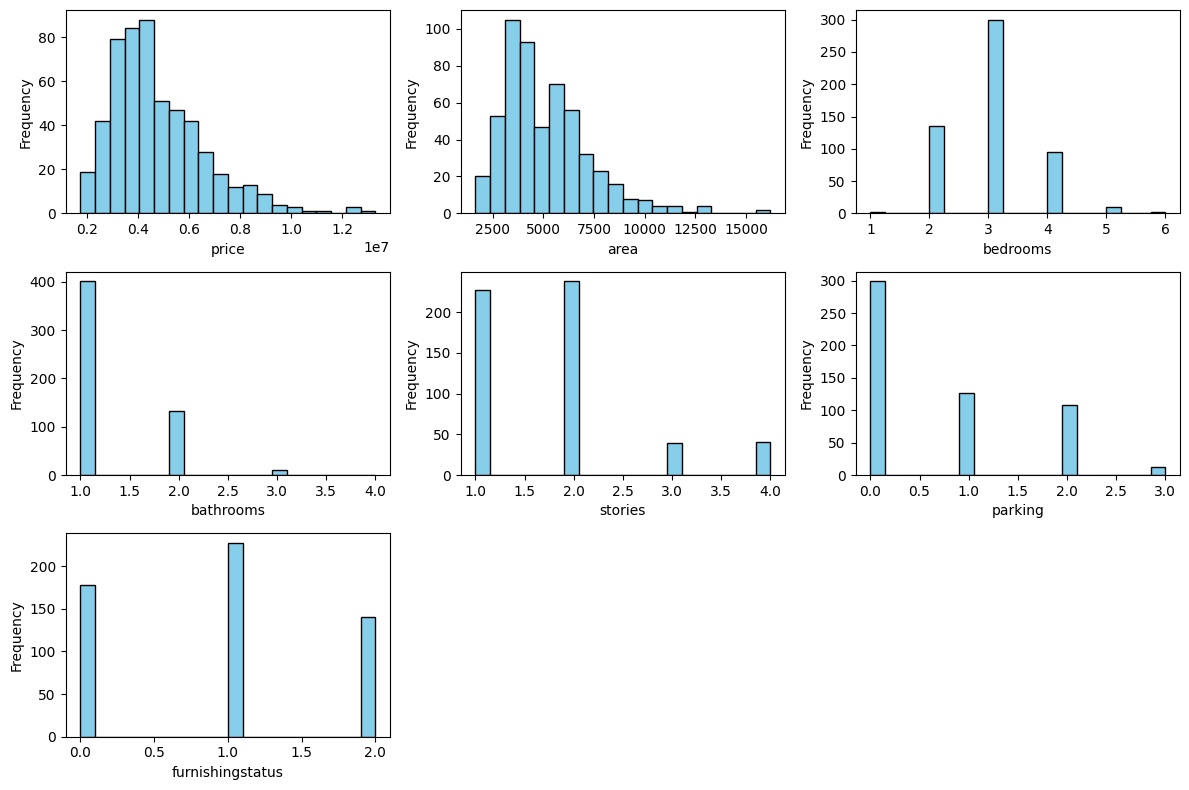

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Check for missing values
missing_values = House_Data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
House_Data.dropna(inplace=True)

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Convert 'furnishingstatus' to numerical
House_Data['furnishingstatus'] = House_Data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Prepare data for plotting
plot_data = House_Data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']]

# Plot histograms for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(plot_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()
